**Questão opcional 1: Dataset Iris**


**Questão opcional 2: Dataset Wine**

In [1]:
# Importar bibliotecas necessárias
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os datasets Iris e Wine
iris = load_iris()
wine = load_wine()

# Extrair as features
iris_data = iris.data  # Dados do Iris
wine_data = wine.data  # Dados do Wine

# Definir um intervalo de K para análise
k_values = range(1, 11)

# Método do Cotovelo e Índice de Silhueta para ambos os datasets
results = {
    "iris": {"inertia": [], "silhouette": []},
    "wine": {"inertia": [], "silhouette": []}
}




In [2]:
# Analisar o Iris
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_data)
    results["iris"]["inertia"].append(kmeans.inertia_)
    if k > 1:  # Silhouette Score é válido apenas para K > 1
        results["iris"]["silhouette"].append(silhouette_score(iris_data, kmeans.labels_))

In [3]:

# Analisar o Wine
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_data)
    results["wine"]["inertia"].append(kmeans.inertia_)
    if k > 1:  # Silhouette Score é válido apenas para K > 1
        results["wine"]["silhouette"].append(silhouette_score(wine_data, kmeans.labels_))




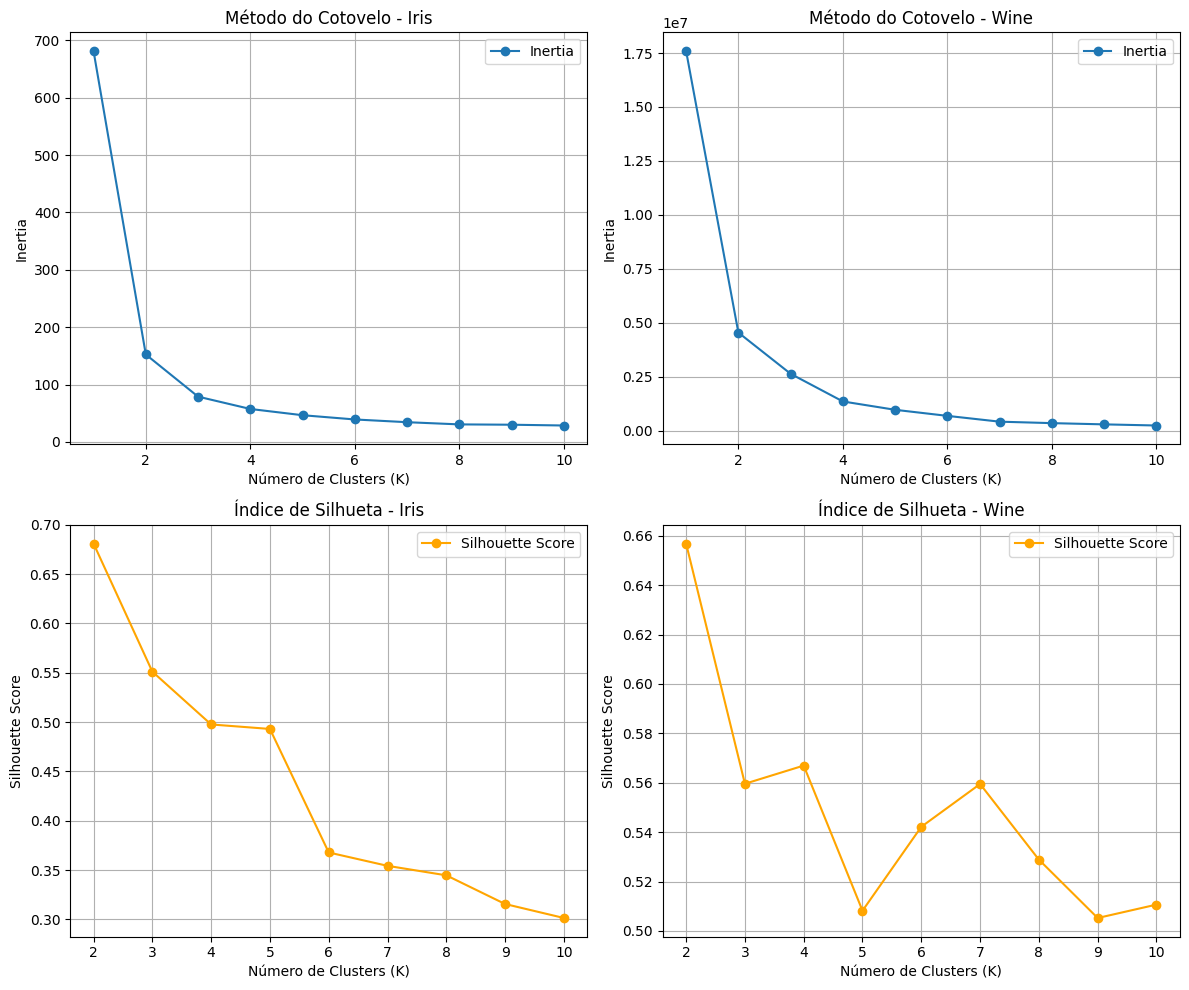

Valores Ideais de K
Dataset Iris: Cotovelo = 3, Silhueta = 2
Dataset Wine: Cotovelo = 3, Silhueta = 2


In [4]:
# Plotar os resultados do Método do Cotovelo e Índice de Silhueta
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Método do Cotovelo - Iris
axs[0, 0].plot(k_values, results["iris"]["inertia"], marker='o', label="Inertia")
axs[0, 0].set_title("Método do Cotovelo - Iris")
axs[0, 0].set_xlabel("Número de Clusters (K)")
axs[0, 0].set_ylabel("Inertia")
axs[0, 0].grid()
axs[0, 0].legend()

# Método do Cotovelo - Wine
axs[0, 1].plot(k_values, results["wine"]["inertia"], marker='o', label="Inertia")
axs[0, 1].set_title("Método do Cotovelo - Wine")
axs[0, 1].set_xlabel("Número de Clusters (K)")
axs[0, 1].set_ylabel("Inertia")
axs[0, 1].grid()
axs[0, 1].legend()

# Índice de Silhueta - Iris
axs[1, 0].plot(k_values[1:], results["iris"]["silhouette"], marker='o', label="Silhouette Score", color='orange')
axs[1, 0].set_title("Índice de Silhueta - Iris")
axs[1, 0].set_xlabel("Número de Clusters (K)")
axs[1, 0].set_ylabel("Silhouette Score")
axs[1, 0].grid()
axs[1, 0].legend()

# Índice de Silhueta - Wine
axs[1, 1].plot(k_values[1:], results["wine"]["silhouette"], marker='o', label="Silhouette Score", color='orange')
axs[1, 1].set_title("Índice de Silhueta - Wine")
axs[1, 1].set_xlabel("Número de Clusters (K)")
axs[1, 1].set_ylabel("Silhouette Score")
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Determinar os valores ideais
iris_elbow = results["iris"]["inertia"]
iris_silhouette_max = max(results["iris"]["silhouette"])

wine_elbow = results["wine"]["inertia"]
wine_silhouette_max = max(results["wine"]["silhouette"])

iris_silhouette_k = results["iris"]["silhouette"].index(iris_silhouette_max) + 2  # Ajustar índice
wine_silhouette_k = results["wine"]["silhouette"].index(wine_silhouette_max) + 2  # Ajustar índice

print("Valores Ideais de K")
print(f"Dataset Iris: Cotovelo = 3, Silhueta = {iris_silhouette_k}")
print(f"Dataset Wine: Cotovelo = 3, Silhueta = {wine_silhouette_k}")

### Iris dataset
1.1 Método do Cotovelo:
O gráfico do método do cotovelo para o dataset Iris mostra uma mudança significativa na Inertia ao passar de K=2 para K=3, mas o "cotovelo" mais claro está em K=3. Isso sugere que o número ideal de clusters é K=3.

1.2 Índice de Silhueta:
O índice de silhueta para o dataset Iris apresenta o maior valor em K=2. Isso indica que os clusters estão mais bem separados com 2 clusters do que com valores maiores de K.

Conclusão:
Os dois métodos dão resultados ligeiramente diferentes:

O método do cotovelo sugere K=3.
O índice de silhueta sugere K=2.
Essa diferença pode ser explicada pelas características intrínsecas dos dados, já que o método do cotovelo foca na redução da Inertia e o índice de silhueta avalia a qualidade da separação entre clusters.

### Wine dataset

2.1 Método do Cotovelo:
O gráfico do método do cotovelo para o dataset Wine mostra um "cotovelo" mais visível em K=3, sugerindo que este é o número ideal de clusters para os dados.

2.2 Índice de Silhueta:
O índice de silhueta para o dataset Wine apresenta o maior valor em K=2, indicando que dois clusters fornecem a melhor separação para os dados.

Conclusão:
Semelhante ao caso do dataset Iris:

O método do cotovelo sugere K=3.
O índice de silhueta sugere K=2.
Essa discrepância destaca a importância de considerar a aplicação prática e os objetivos da clusterização ao escolher o valor ideal de K. Por exemplo, se a prioridade for a separação mais nítida entre clusters, o índice de silhueta pode ser mais apropriado.
